In [1]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import klib

In [3]:
data = pd.read_csv('student_marks.csv')

In [4]:
data.head()

Student_ID  Test_1  Test_2  Test_3  Test_4  Test_5  Test_6  Test_7  Test_8  \
0       22000      78      87      91      91      88      98      94     100   
1       22001      79      71      81      72      73      68      59      69   
2       22002      66      65      70      74      78      86      87      96   
3       22003      60      58      54      61      54      57      64      62   
4       22004      99      95      96      93      97      89      92      98   

   Test_9  Test_10  Test_11  Test_12  
0     100      100      100       93  
1      59       60       61       67  
2      88       82       90       86  
3      72       63       72       76  
4      91       98       95       88

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Student_ID  56 non-null     int64
 1   Test_1      56 non-null     int64
 2   Test_2      56 non-null     int64
 3   Test_3      56 non-null     int64
 4   Test_4      56 non-null     int64
 5   Test_5      56 non-null     int64
 6   Test_6      56 non-null     int64
 7   Test_7      56 non-null     int64
 8   Test_8      56 non-null     int64
 9   Test_9      56 non-null     int64
 10  Test_10     56 non-null     int64
 11  Test_11     56 non-null     int64
 12  Test_12     56 non-null     int64
dtypes: int64(13)
memory usage: 5.8 KB


In [6]:
data.isnull().mean()*100

Student_ID    0.0
Test_1        0.0
Test_2        0.0
Test_3        0.0
Test_4        0.0
Test_5        0.0
Test_6        0.0
Test_7        0.0
Test_8        0.0
Test_9        0.0
Test_10       0.0
Test_11       0.0
Test_12       0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

### One Variable Analysis

<Axes: xlabel='Test_12', ylabel='Density'>

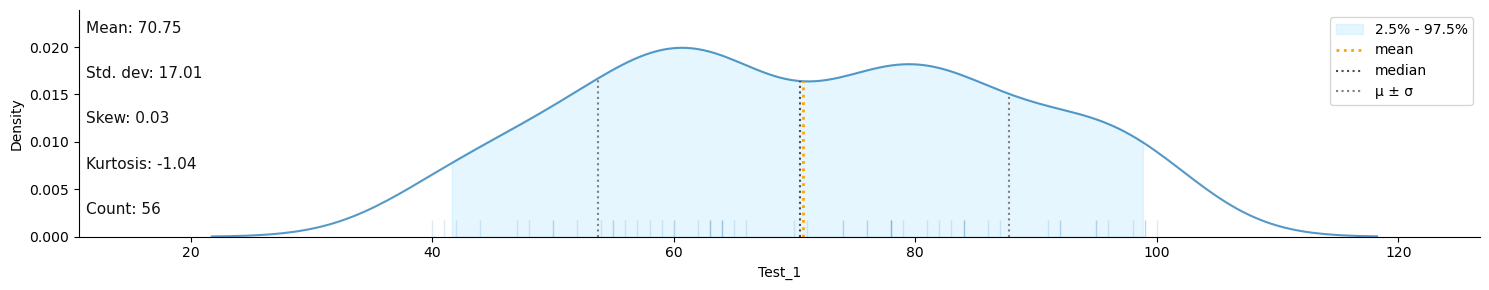

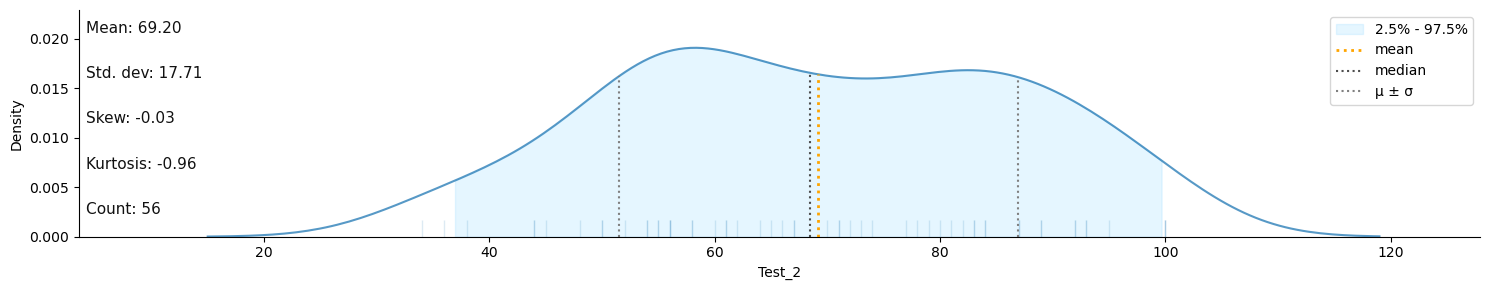

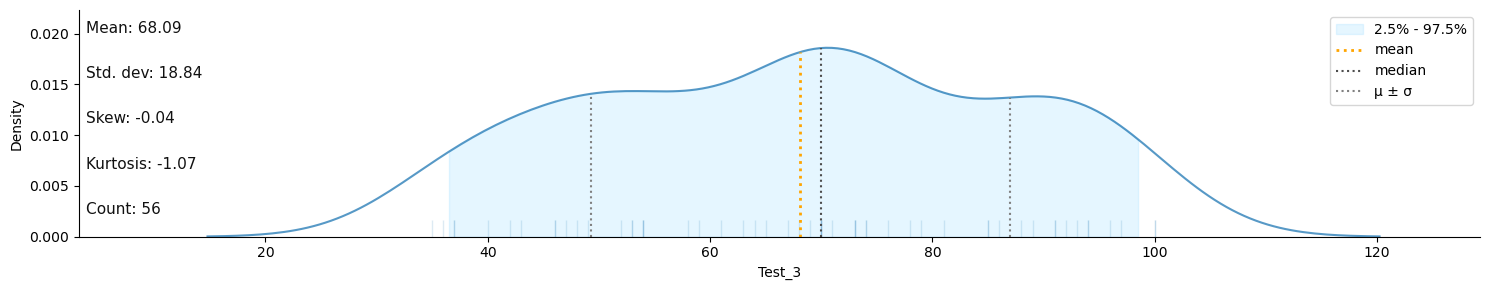

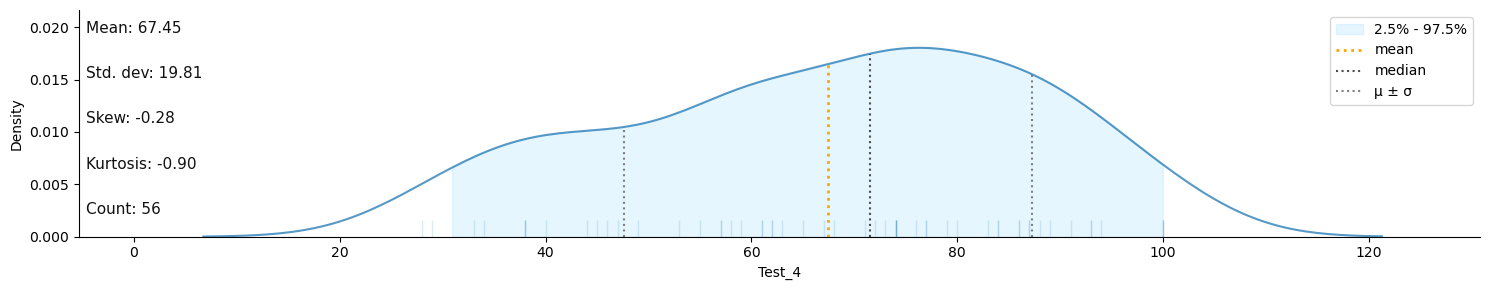

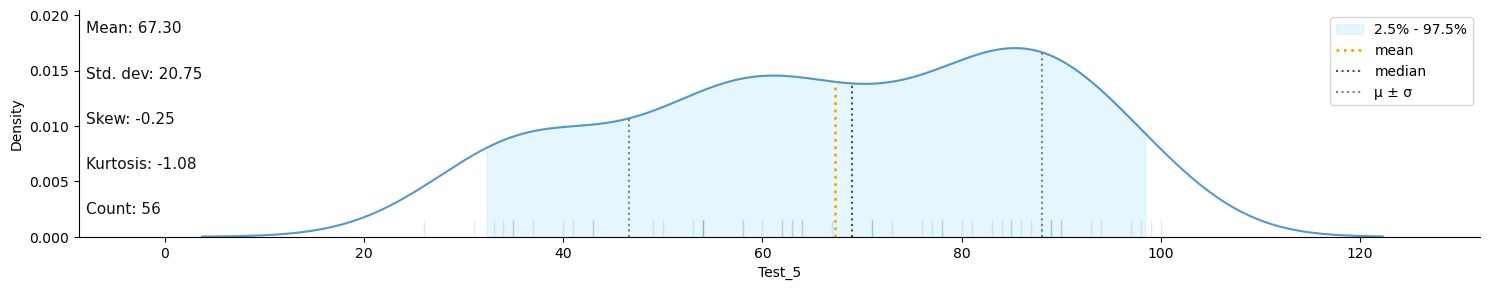

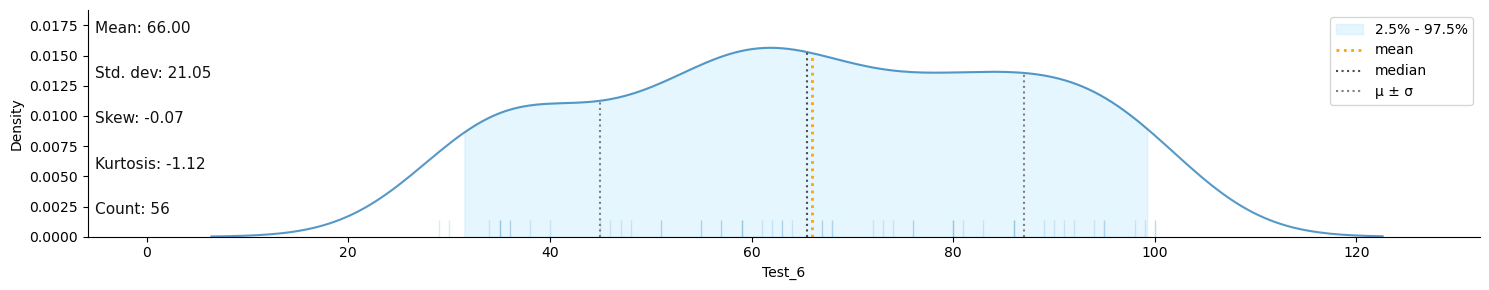

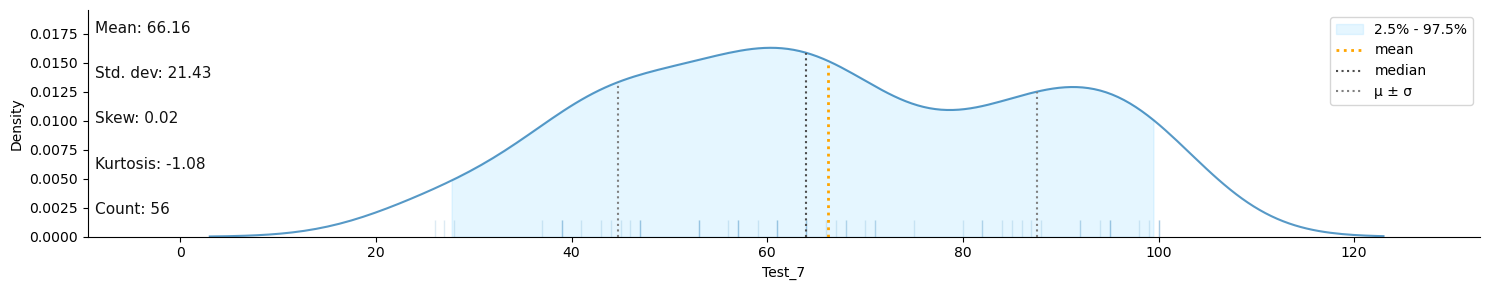

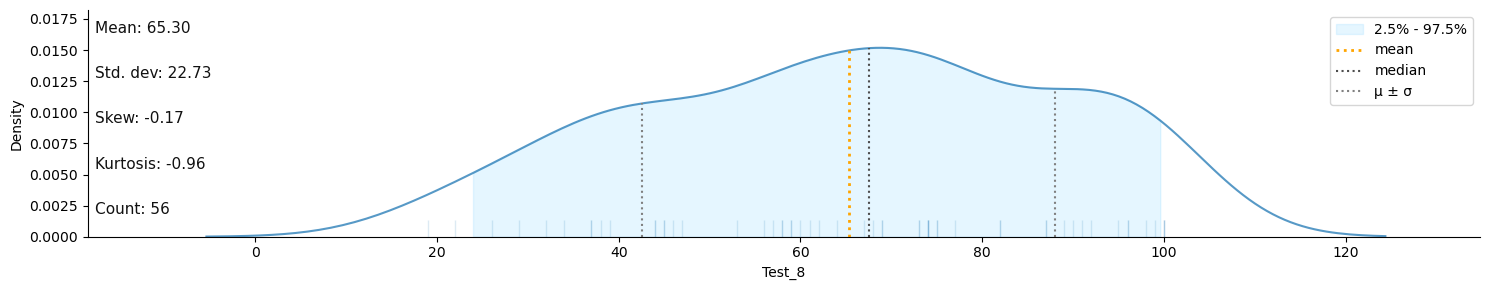

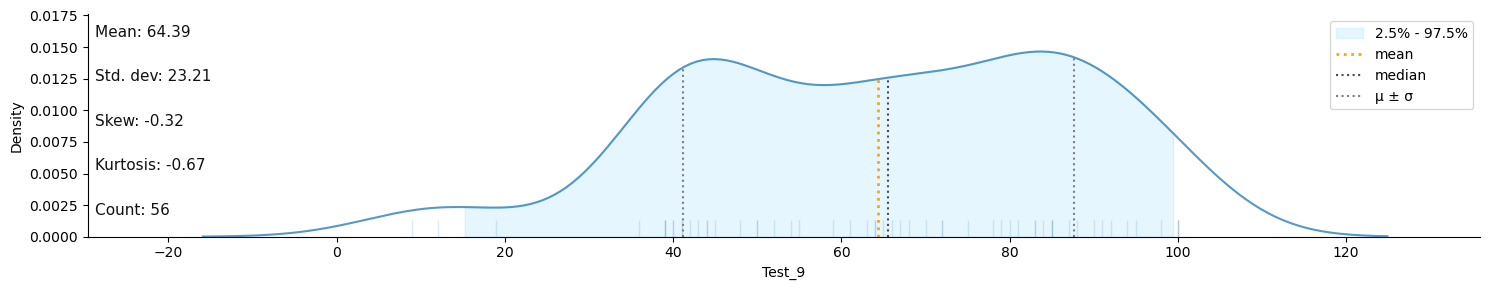

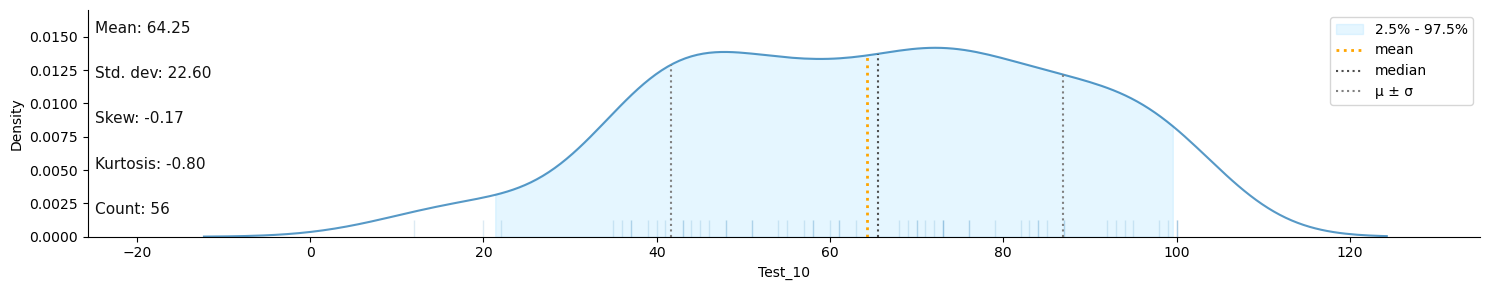

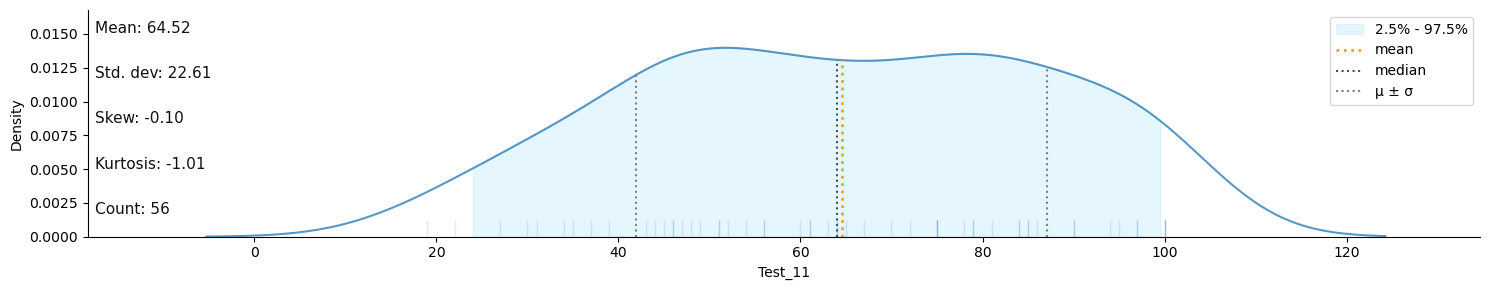

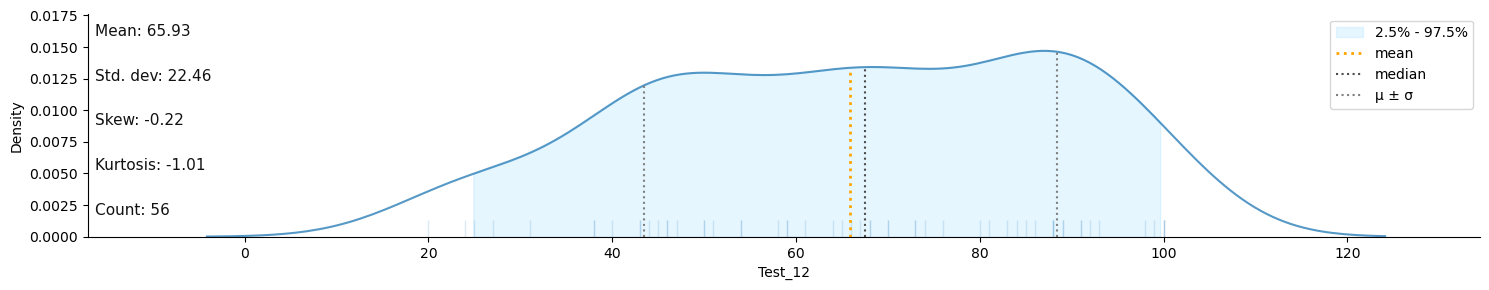

In [8]:
klib.dist_plot(data[list(data.columns[1:])])

In [9]:
for col in data.columns[1:]:
    fig=px.histogram(data,x=col,nbins=5,text_auto=True)

    fig.update_layout(autosize=False, width=900,height=250)

    fig.update_layout(bargap=0.2)
    fig.show()

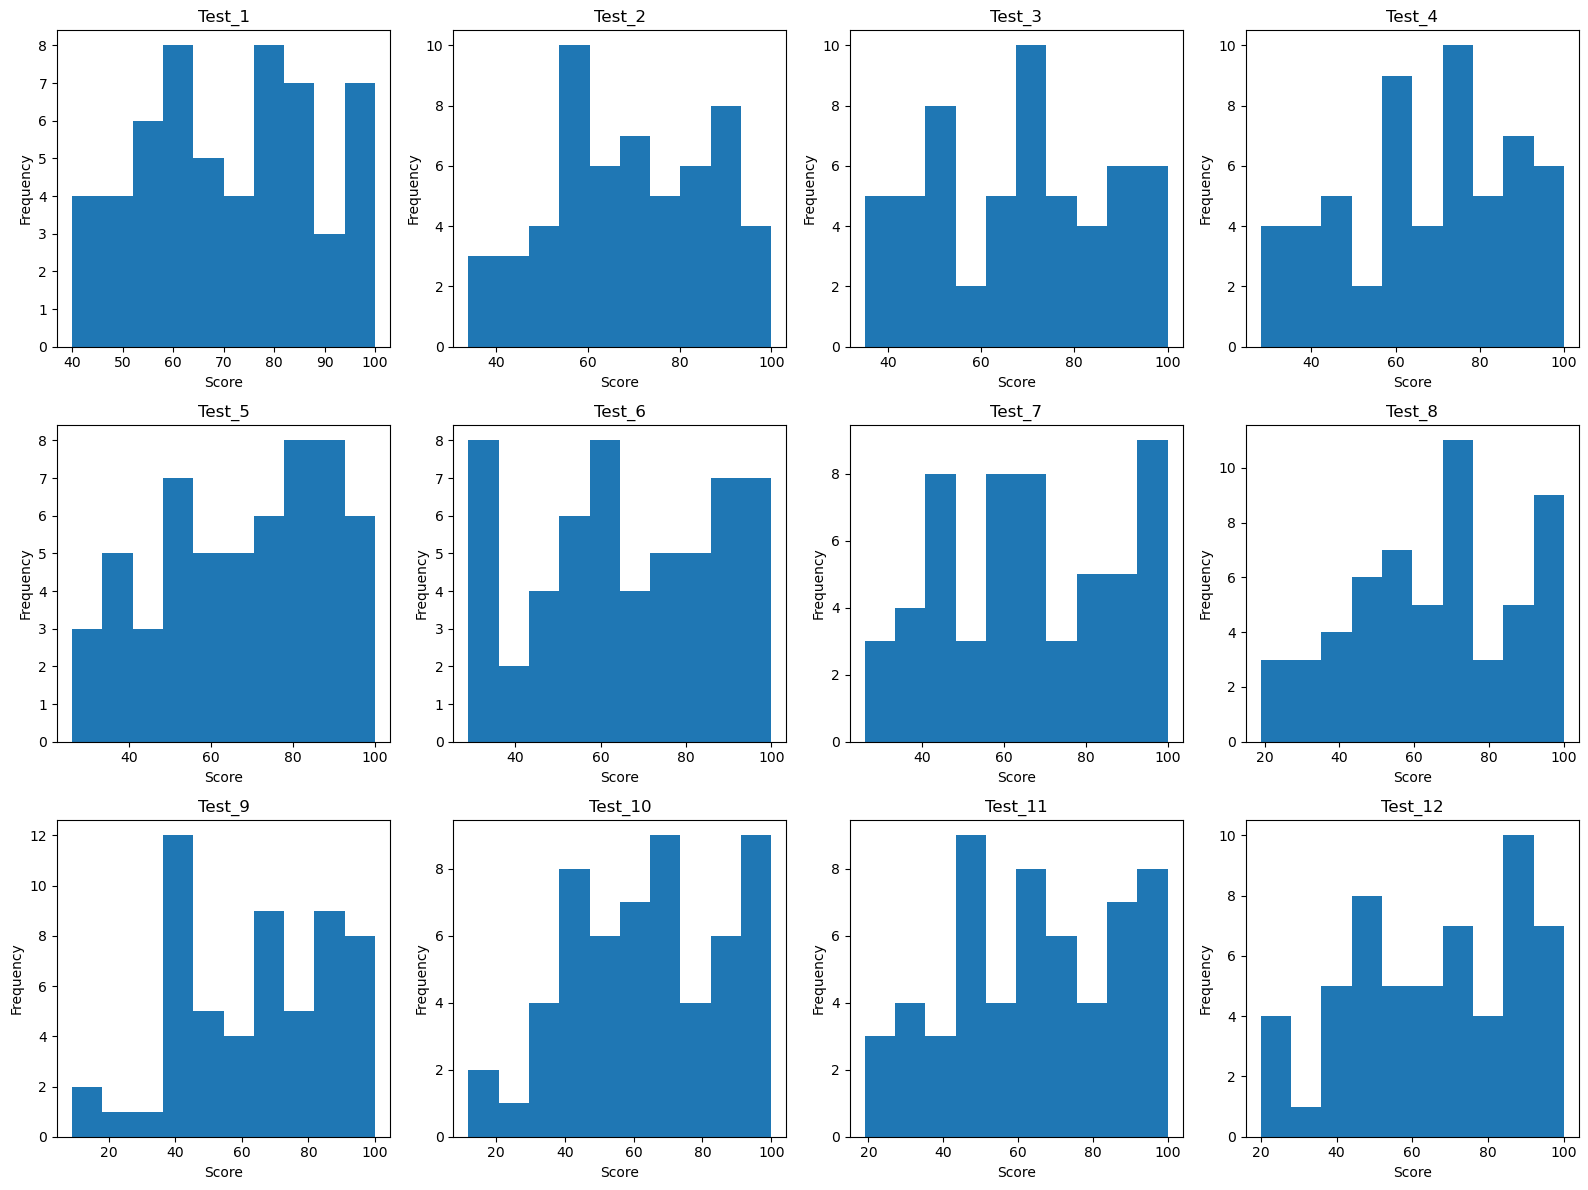

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

for i, col in enumerate(data.columns[1:]):
    ax = axes[i // 4, i % 4]
    data[col].plot(kind='hist', ax=ax, title=col)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

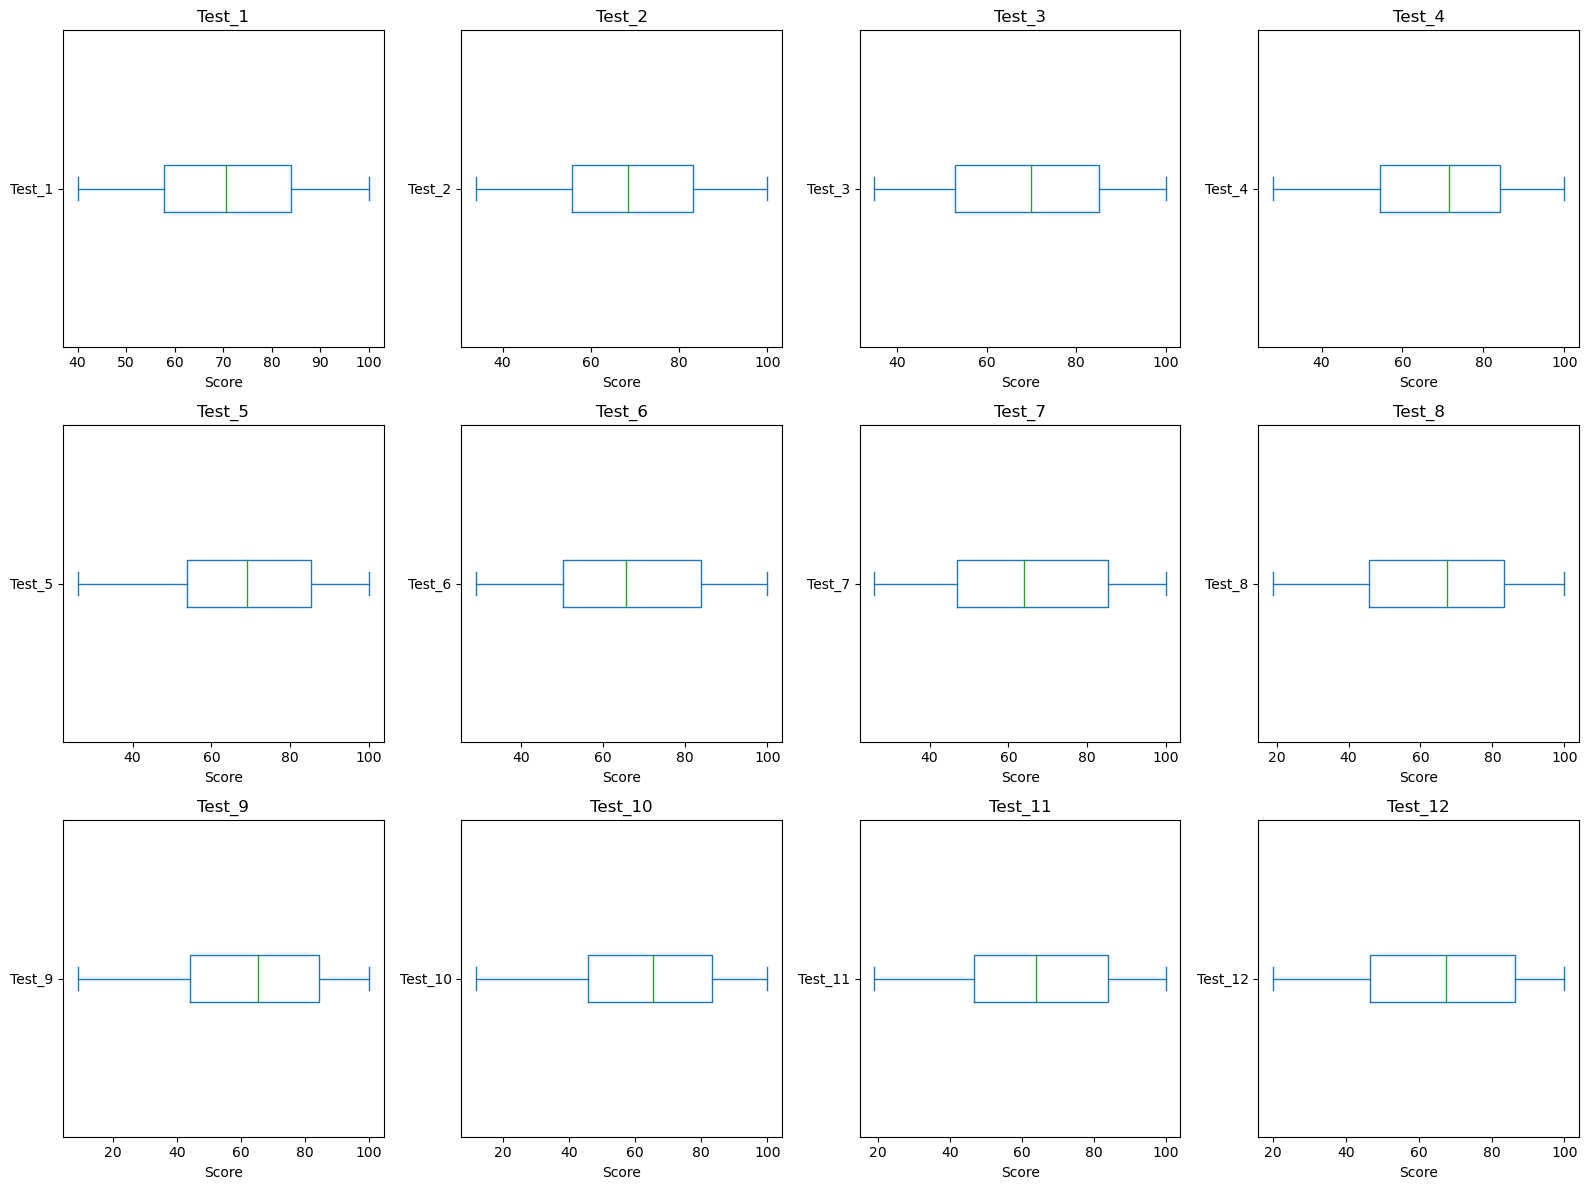

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

for i, col in enumerate(data.columns[1:]):
    ax = axes[i // 4, i % 4]
    data[col].plot(kind='box', ax=ax, vert=False, title=col)
    ax.set_xlabel('Score')

plt.tight_layout()
plt.show()

### Trend Analysis

In [12]:
avg_scores = data.mean()
names = data.columns[1:]

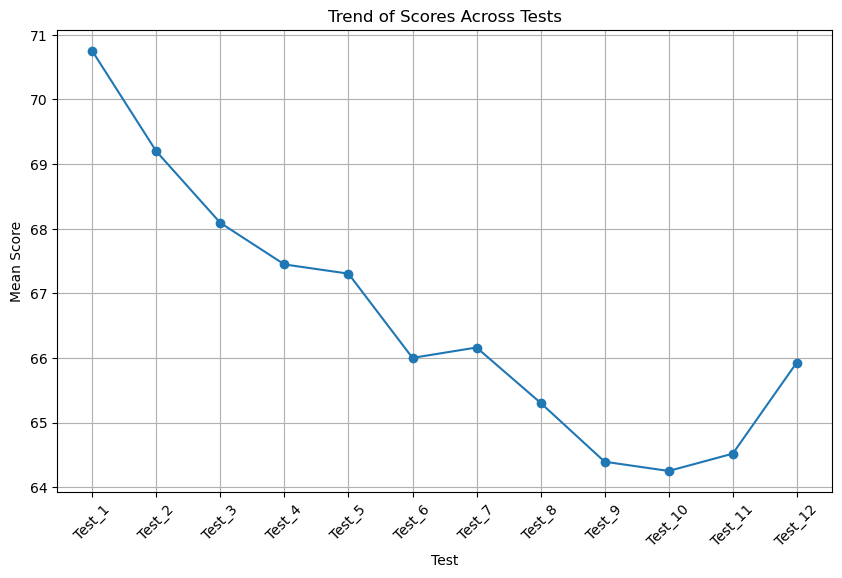

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(names, avg_scores[1:], marker='o')
plt.title('Trend of Scores Across Tests')
plt.xlabel('Test')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

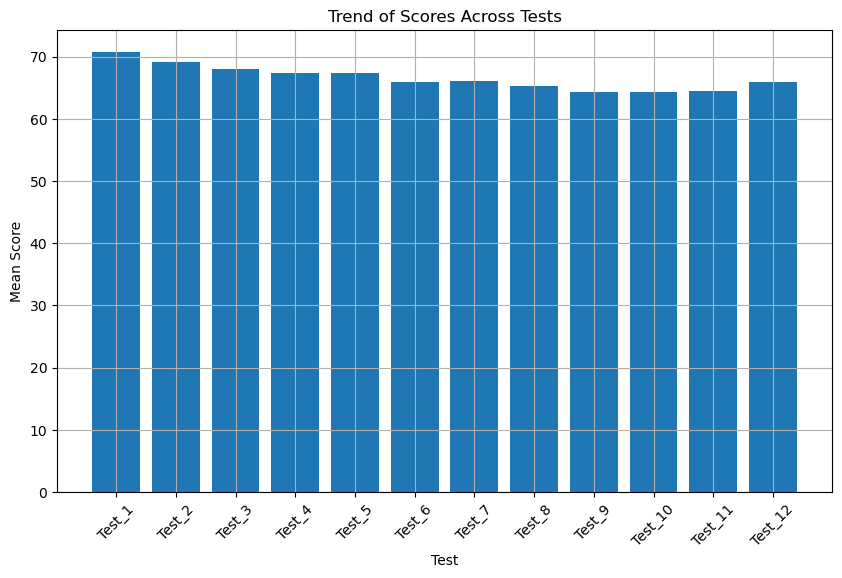

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(names, avg_scores[1:])
plt.title('Trend of Scores Across Tests')
plt.xlabel('Test')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

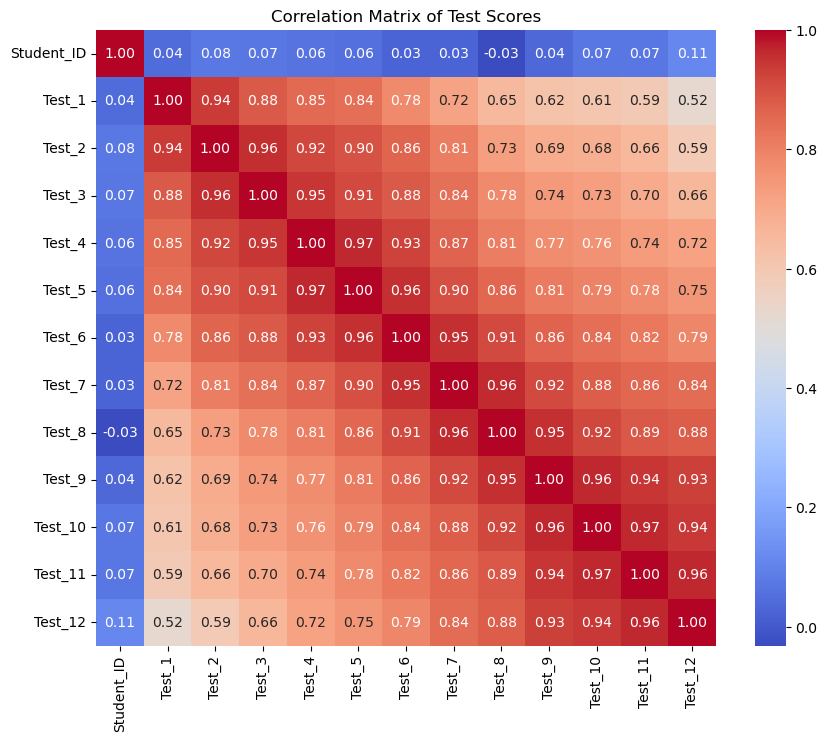

In [15]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Test Scores')
plt.show()

In [16]:
min_scores = data.min()
min_scores

Student_ID    22000
Test_1           40
Test_2           34
Test_3           35
Test_4           28
Test_5           26
Test_6           29
Test_7           26
Test_8           19
Test_9            9
Test_10          12
Test_11          19
Test_12          20
dtype: int64

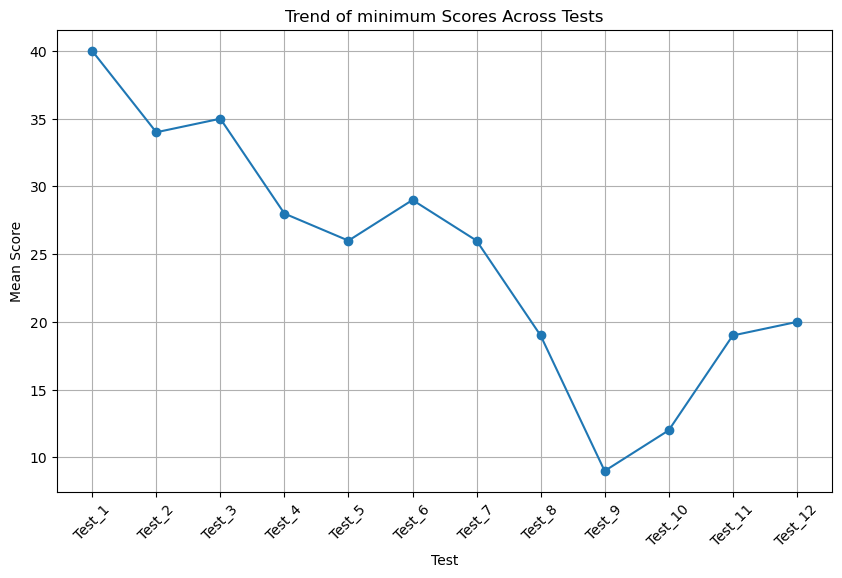

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(names, min_scores[1:], marker='o')
plt.title('Trend of minimum Scores Across Tests')
plt.xlabel('Test')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

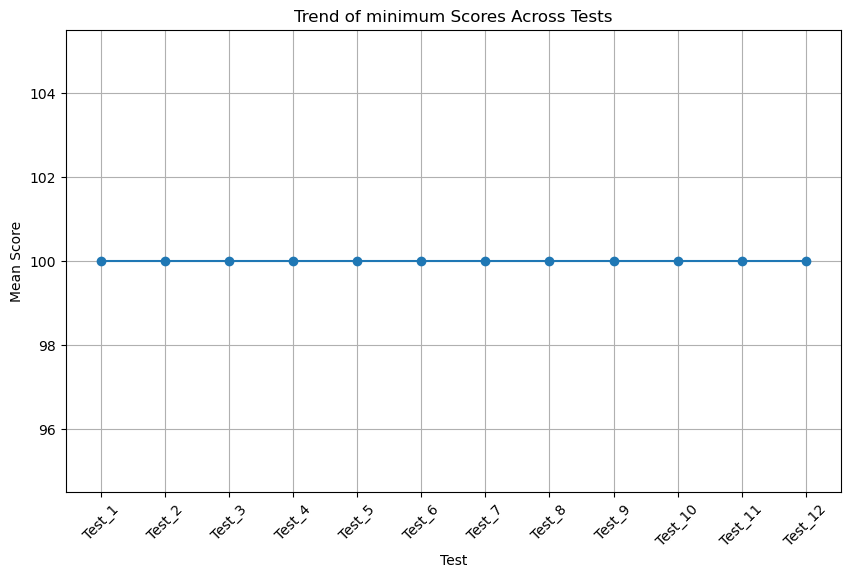

In [18]:
max_scores = data.max()
plt.figure(figsize=(10, 6))
plt.plot(names, max_scores[1:], marker='o')
plt.title('Trend of minimum Scores Across Tests')
plt.xlabel('Test')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [19]:
toppers = []

for col in data.columns[1:]:
    toppers.append(data['Student_ID'][np.argmax(data[col])])

In [20]:
toppers

[22040,
 22032,
 22042,
 22032,
 22053,
 22025,
 22031,
 22000,
 22000,
 22000,
 22000,
 22031]

<Axes: ylabel='count'>

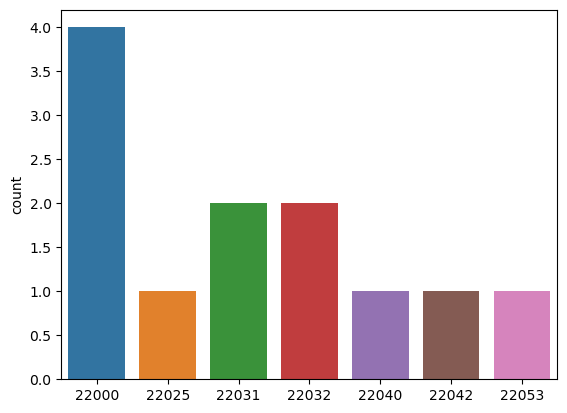

In [21]:
sns.countplot(x=toppers)

In [22]:
least_scorers = []

for col in data.columns[1:]:
    least_scorers.append(data['Student_ID'][np.argmin(data[col])])

In [23]:
least_scorers

[22010,
 22010,
 22005,
 22005,
 22020,
 22046,
 22022,
 22022,
 22022,
 22022,
 22013,
 22013]

<Axes: ylabel='count'>

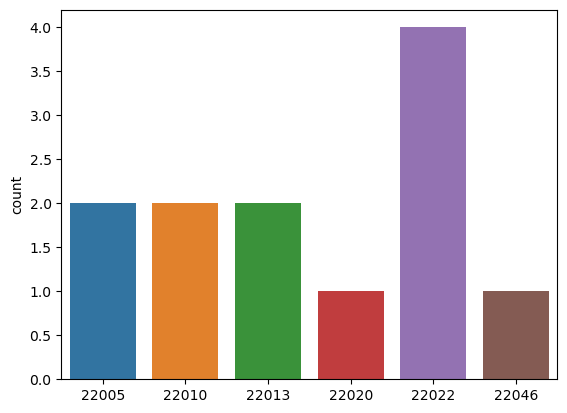

In [24]:
sns.countplot(x=least_scorers)